# Linear Regression - Hiring MV

### Preprocessing

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid')

In [2]:
df = pd.read_csv('https://github.com/codebasics/py/raw/master/ML/2_linear_reg_multivariate/Exercise/hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  6 non-null      object 
 1   test_score(out of 10)       7 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 384.0+ bytes


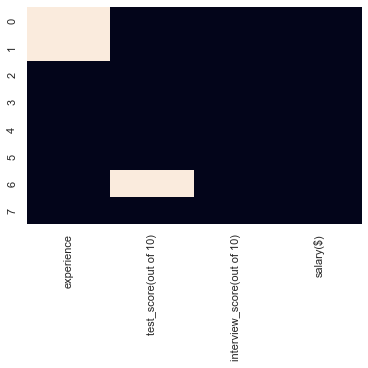

In [4]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [5]:
df['experience'].unique()

array([nan, 'five', 'two', 'seven', 'three', 'ten', 'eleven'],
      dtype=object)

In [6]:
df['experience'] = df['experience'].replace({
    'five': 5,
    'two': 2,
    'seven': 7,
    'three': 3,
    'ten': 10,
    'eleven': 11
})
df['experience'] = df['experience'].fillna(0)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0.0,8.0,9,50000
1,0.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [7]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].median())
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0.0,8.0,9,50000
1,0.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,8.0,7,72000
7,11.0,7.0,8,80000


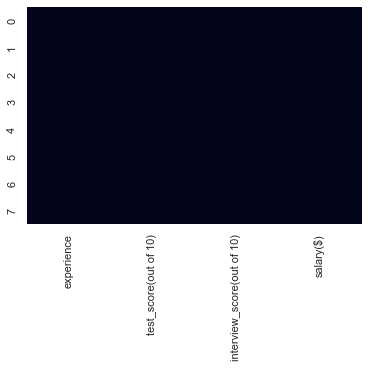

In [8]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [9]:
df.describe()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
count,8.00000,8.000000,8.000000,8.00000
mean,4.75000,7.875000,7.875000,63000.00000
std,4.26782,1.246423,1.642081,11501.55269
min,0.00000,6.000000,6.000000,45000.00000
25%,1.50000,7.000000,6.750000,57500.00000
50%,4.00000,8.000000,7.500000,63500.00000
75%,7.75000,8.250000,9.250000,70500.00000
max,11.00000,10.000000,10.000000,80000.00000


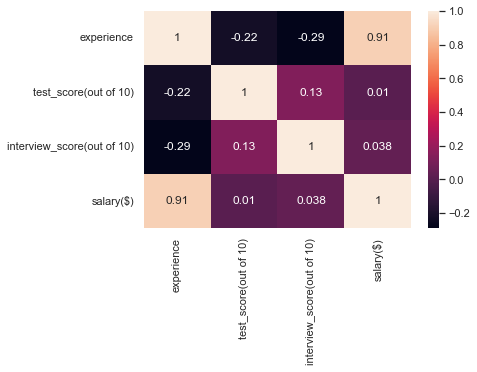

In [10]:
sns.heatmap(df.corr(), annot=True)
plt.show()

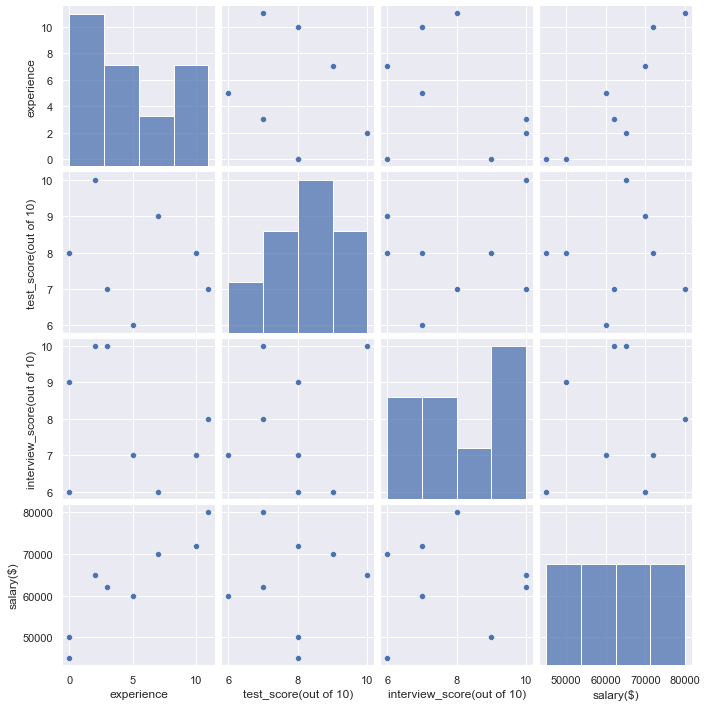

In [11]:
sns.pairplot(df)
plt.show()

In [12]:
X_train = df.drop('salary($)', axis=1)
y_train = df['salary($)']

### Modelling

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
model.coef_, model.intercept_

(array([2812.95487627, 1845.70596798, 2205.24017467]), 17737.263464337666)

### Evaluation

- 2 yr experience, 9 test score, 6 interview score
- 12 yr experience, 10 test score, 10 interview score

In [15]:
eval_df = pd.DataFrame({
    'experience': [2, 12],
    'test_score(out of 10)': [9., 10.],
    'interview_score(out of 10)': [6, 10], 
})
eval_df

,experience,test_score(out of 10),interview_score(out of 10)
0,2,9.0,6
1,12,10.0,10


In [16]:
eval_df['salary($)'] = model.predict(eval_df)
eval_df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,2,9.0,6,53205.967977
1,12,10.0,10,92002.183406
